### Importing Libraries

In [218]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Read Data

In [184]:
data = pd.read_csv("day.csv")
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Quality check

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Visualising relationship for numerical variable 

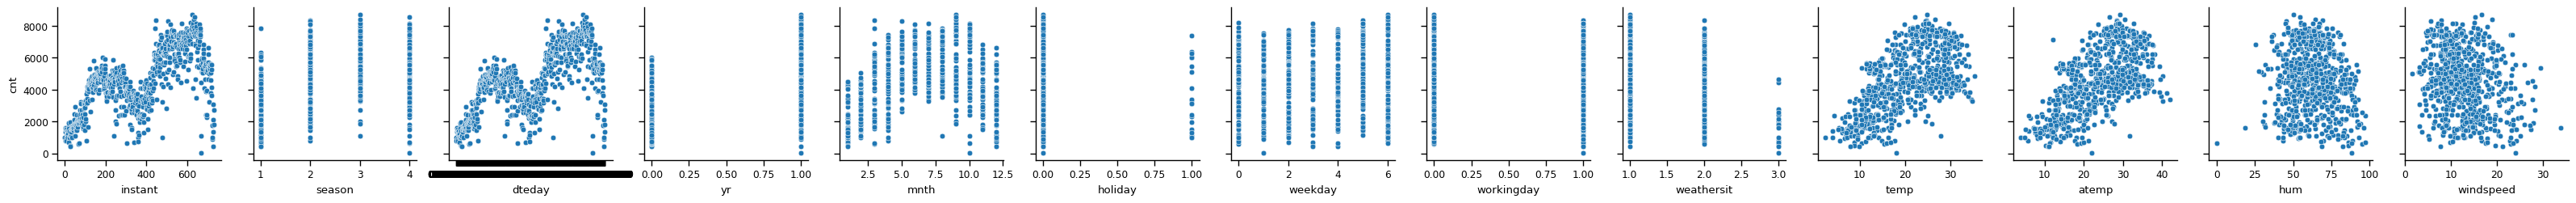

In [186]:
X_var = ['instant','season','dteday','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']

sns.pairplot(data = data, x_vars=X_var, y_vars='cnt')
plt.show()

### Data Encoding 

In [187]:
data = data.drop(['casual','registered','instant','dteday'], axis=1)
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['weathersit'] = data['weathersit'].map({1:'clear', 2:'mist', 3:'light_rain', 4:'heavy_rain'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [188]:
# creating dummy variables

data = pd.get_dummies(data = data, columns=['season','weathersit'],drop_first=True, dtype=int, prefix= '', prefix_sep='')
data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### Understanding the correlations between different features

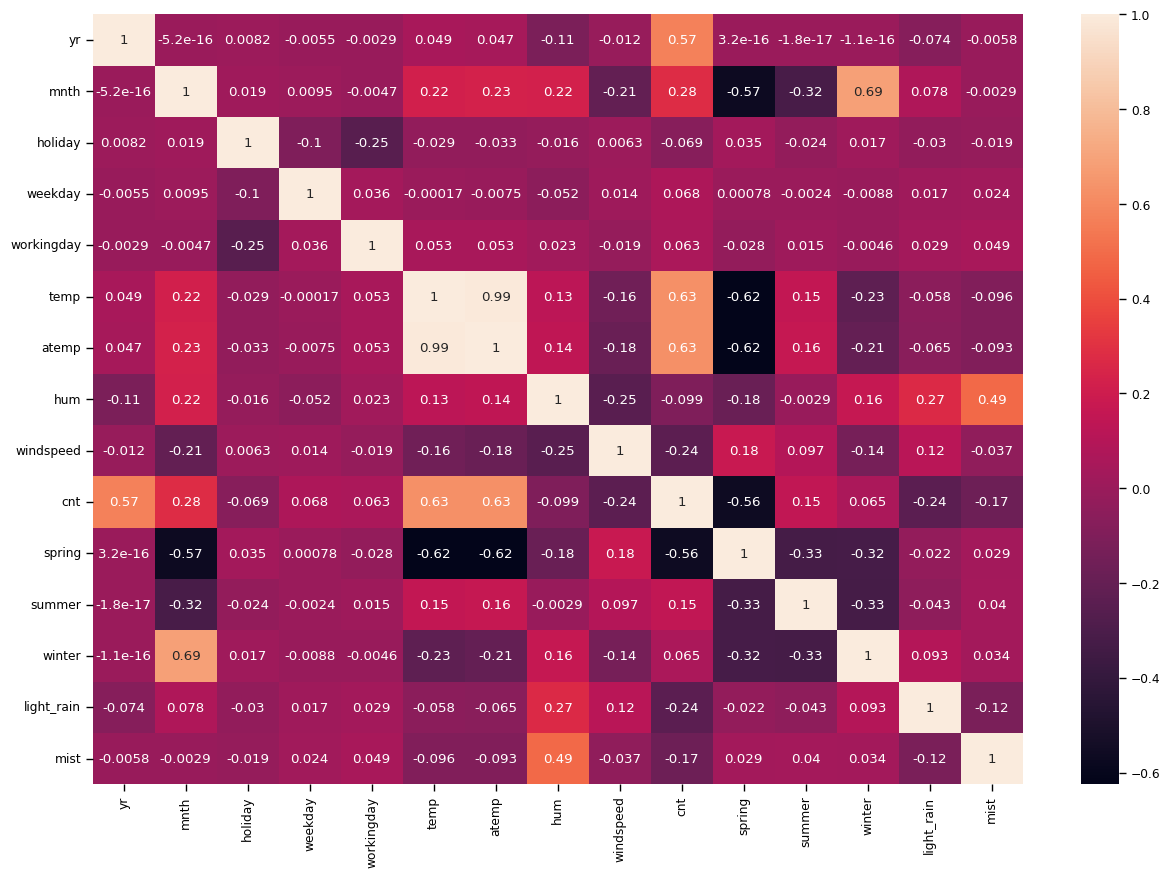

In [190]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data.corr(),annot=True, ax = ax)
plt.show()

### Split test and train data

In [191]:
data_train, data_test = train_test_split(data,train_size=0.7, random_state=100)
print(data_train.shape,data_test.shape)

(510, 15) (220, 15)


### Scale the necessary feature columns

In [192]:
scaler = MinMaxScaler()
scale_column = ['mnth','weekday','temp','atemp','hum','windspeed']

data_train[scale_column] = scaler.fit_transform(data_train[scale_column])

data_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,mist
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,1
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,1
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,1683,0,1,0,0,1


In [193]:
data_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,4485.337255,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,1950.666077,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection

In [194]:
y_train = data_train.pop('cnt')
X_train = data_train

In [195]:
# using automated RFE process

lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(estimator=lr,n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [196]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('mist', True, 1)]

In [197]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'light_rain', 'mist'],
      dtype='object')

In [198]:
X_train_rfe = X_train[col]

### Linear Model Building

In [199]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm)
lr_model = lm.fit()

In [200]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.85e-181
Time:                        16:09:17   Log-Likelihood:                -4144.3
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     499   BIC:                             8357.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2964.3415    282.788     10.483      0.000    2408.740    3519.943
yr          2017.3834     74.352     27.133      0.000    1871.301    2163.465
holiday     -755.2925    234.016     -3.228      0.001   -1215.072    -295.513
temp        2903.5080   1174.227      2.473      0.014     596.470    5210.546
atemp       1007.3638   1238.352      0.813      0.416   -1425.662    3440.390
hum        -1135.5989    342.468     -3.316      0.001   -1808.456    -462.742
windspeed  -1443.5531    235.995     -6.117      0.000   -1907.220    -979.886
spring     -1022.6263    135.521     -7.546      0.000   -1288.888    -756.364
winter       449.0775    113.350      3.962      0.000     226.375     671.780
light_rain -2121.9541    241.598     -8.783      0.000   -2596.629   -1647.279
mist        -462.6634     96.118     -4.813      0.000    -651.510    -273.817
==============================================================================
Omnibus:                       66.319   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.302
Skew:                          -0.666   Prob(JB):                     7.73e-37
Kurtosis:                       5.460   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### check VIF for manual feature selection

In [201]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,features,VIF
3,atemp,350.96
2,temp,348.31
4,hum,22.05
5,windspeed,4.03
6,spring,2.51
9,mist,2.24
7,winter,2.10
0,yr,2.05
8,light_rain,1.21
1,holiday,1.04


### Fine tune the model through hybrid approach

In [202]:
X_train_rfe = X_train_rfe.drop('atemp',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm)
lr_model = lm.fit()

In [203]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.75e-182
Time:                        16:09:17   Log-Likelihood:                -4144.7
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     500   BIC:                             8352.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2979.1107    282.109     10.560      0.000    2424.846    3533.376
yr          2017.0240     74.326     27.138      0.000    1870.995    2163.053
holiday     -763.2394    233.733     -3.265      0.001   -1222.460    -304.019
temp        3834.7557    261.220     14.680      0.000    3321.532    4347.979
hum        -1117.0317    341.591     -3.270      0.001   -1788.162    -445.901
windspeed  -1474.6319    232.803     -6.334      0.000   -1932.025   -1017.238
spring     -1024.3687    135.458     -7.562      0.000   -1290.506    -758.231
winter       456.3461    112.959      4.040      0.000     234.413     678.279
light_rain -2137.8767    240.722     -8.881      0.000   -2610.829   -1664.925
mist        -465.4074     96.027     -4.847      0.000    -654.073    -276.742
==============================================================================
Omnibus:                       64.024   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.786
Skew:                          -0.643   Prob(JB):                     1.22e-35
Kurtosis:                       5.431   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,features,VIF
3,hum,21.59
2,temp,12.98
4,windspeed,3.94
5,spring,2.51
8,mist,2.23
6,winter,2.08
0,yr,2.05
7,light_rain,1.20
1,holiday,1.04


In [205]:
X_train_rfe = X_train_rfe.drop('hum',axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm)
lr_model = lm.fit()

In [206]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     284.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.44e-181
Time:                        16:09:17   Log-Likelihood:                -4150.1
No. Observations:                 510   AIC:                             8318.
Df Residuals:                     501   BIC:                             8356.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2366.0097    212.823     11.117      0.000    1947.875    2784.145
yr          2042.9765     74.612     27.381      0.000    1896.385    2189.568
holiday     -771.2431    235.971     -3.268      0.001   -1234.857    -307.629
temp        3646.3425    257.239     14.175      0.000    3140.942    4151.743
windspeed  -1259.1519    225.433     -5.585      0.000   -1702.062    -816.242
spring     -1047.6118    136.574     -7.671      0.000   -1315.940    -779.283
winter       387.4457    112.045      3.458      0.001     167.310     607.582
light_rain -2444.1720    223.887    -10.917      0.000   -2884.045   -2004.299
mist        -647.0445     79.086     -8.182      0.000    -802.425    -491.664
==============================================================================
Omnibus:                       62.750   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.263
Skew:                          -0.638   Prob(JB):                     3.18e-34
Kurtosis:                       5.373   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,features,VIF
3,windspeed,3.91
2,temp,3.53
0,yr,2.05
4,spring,1.64
7,mist,1.49
5,winter,1.36
6,light_rain,1.08
1,holiday,1.04


### Residual Analysis

In [208]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred

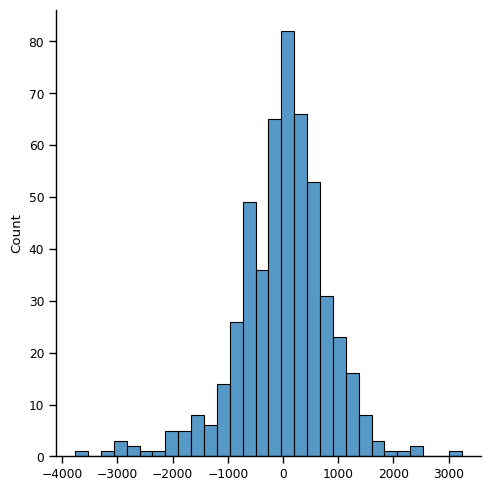

In [209]:
sns.displot(res)

### Prediction and Evaluation on Test Set


In [210]:
# pre-processing test data set

scale_column = ['mnth','weekday','temp','atemp','hum','windspeed']

data_test[scale_column] = scaler.transform(data_test[scale_column])

data_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,mist
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,0,0,1
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,6211,0,1,0,0,0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,2659,0,0,1,0,1
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,0,0,0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,4968,0,1,0,0,0


In [211]:
data_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.502273,0.700000,0.558718,0.532847,0.638221,0.313293,4560.559091,0.254545,0.263636,0.236364,0.027273,0.318182
std,0.500809,0.311120,0.187620,0.330843,0.459303,0.233187,0.217401,0.148694,0.159584,1904.968544,0.436599,0.441609,0.425817,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
y_test = data_test.pop('cnt')
X_test = data_test

In [213]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light_rain,mist
184,1.0,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1.0,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,1.0,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,1.0,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [214]:
X_test_sm = X_test_sm.drop(['mnth','weekday','workingday','atemp','hum','summer'], axis = 1)

In [215]:
y_test_pred = lr_model.predict(X_test_sm)

### predictibility of the model on test dataset

In [219]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8018826530251253